<a href="https://colab.research.google.com/github/Stancldan/Introduction-to-Julia/blob/master/Assignment_1_%E2%80%9CBag%2C_not_bag%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Julia on Colaboratory ##

[Colaboratory](https://colab.research.google.com) does not provide native support for the [Julia programming language](https://julialang.org). However, since Colaboratory gives you root access to the machine that runs your notebook (the *“runtime”* in Colaboratory terminology), we can install Julia support by uploading a specially crafted Julia notebook  – *this* notebook. We then install Julia and [IJulia](https://github.com/JuliaLang/IJulia.jl) ([Jupyter](https://jupyter.org)/Colaboratory notebook support) and reload the notebook so that Colaboratory detects and initiates what we installed.

In brief:

1. **Run the cell below**
2. **Reload the page**
3. **Edit the notebook name and start hacking Julia code below**

**If your runtime resets**, either manually or if left idle for some time, **repeat steps 1 and 2**.

### Acknowledgements ###

This hack by Pontus Stenetorp is an adaptation of [James Bradbury’s original Colaboratory Julia hack](https://discourse.julialang.org/t/julia-on-google-colab-free-gpu-accelerated-shareable-notebooks/15319/27), that broke some time in September 2019 as Colaboratory increased their level of notebook runtime isolation. There also appears to be CUDA compilation support installed by default for each notebook runtime type in October 2019, which shaves off a good 15 minutes or so from the original hack’s installation time.

In [0]:
%%shell
if ! command -v julia 2>&1 > /dev/null
then
    wget 'https://julialang-s3.julialang.org/bin/linux/x64/1.0/julia-1.0.5-linux-x86_64.tar.gz' \
        -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
fi
julia -e 'using Pkg; pkg"add IJulia; precompile;"'

--2019-11-05 08:26:06--  https://julialang-s3.julialang.org/bin/linux/x64/1.0/julia-1.0.5-linux-x86_64.tar.gz
Resolving julialang-s3.julialang.org (julialang-s3.julialang.org)... 151.101.2.49, 151.101.66.49, 151.101.130.49, ...
Connecting to julialang-s3.julialang.org (julialang-s3.julialang.org)|151.101.2.49|:443... connected.
HTTP request sent, awaiting response... 302 packet.net internal redirect trigger
Location: https://storage.googleapis.com/julialang2/bin/linux/x64/1.0/julia-1.0.5-linux-x86_64.tar.gz [following]
--2019-11-05 08:26:06--  https://storage.googleapis.com/julialang2/bin/linux/x64/1.0/julia-1.0.5-linux-x86_64.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88706549 (85M) [application/octet-stream]
Saving to: ‘/tmp/julia.tar.gz’

/tmp/julia.tar.gz   100%[========

In [1]:
using Pkg

pkg"add FiniteDifferences; precompile;"
using FiniteDifferences

pkg"add NamedArrays; precompile;"
using NamedArrays

pkg"add NPZ; precompile;"
using NPZ

pkg"add Plots; precompile;"
using Plots

using LinearAlgebra
using Random

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
Precompiling project...
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
Precompiling project...
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
Precompiling project...
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
Precompiling project...


# Assignment 1: “Bag, not bag” #

In [0]:
# Download and extract the dataset.
run(`curl -fsS http://udon.stacken.kth.se/\~ninjin/comp0090_assignment_1_data.tar.gz -o /tmp/data.tar.gz`)
run(`tar -x -z -f /tmp/data.tar.gz`)
run(`rm -f /tmp/data.tar.gz`);

In [0]:
# Then load it into RAM.
trainxs = npzread("comp0090_assignment_1_data/fashion-train-imgs.npz")
trainys = npzread("comp0090_assignment_1_data/fashion-train-labels.npz")
devxs   = npzread("comp0090_assignment_1_data/fashion-dev-imgs.npz")
devys   = npzread("comp0090_assignment_1_data/fashion-dev-labels.npz")
testxs  = npzread("comp0090_assignment_1_data/fashion-test-imgs.npz")
testys  = npzread("comp0090_assignment_1_data/fashion-test-labels.npz");

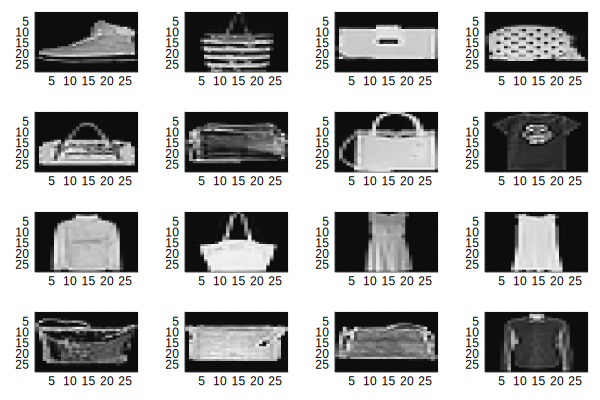

In [4]:
# Let us plot some random training samples.
plt = plot(layout=(4, 4))
for i in 1:4^2
    heatmap!(plt, trainxs[:, :, rand(1:size(trainxs, 3))]',
        subplot=i, yflip=true, color=:grays, colorbar = false)
end
plt

## Assignment 1.1: A memory-efficient voted perceptron ##

To be completed.

## Assignment 1.2: Mean squared-loss logistic regression ##

To be completed.

**Reshape the data into a matrix where each row contain a flatten vector of an observation**

In [0]:
trainxs_2 = reshape(trainxs, (size(trainxs, 3), 28*28))
devxs_2 = reshape(devxs, (size(devxs, 3), 28*28))
testxs_2 = reshape(testxs, (size(testxs, 3), 28*28));

**Define auxiliary functions for logistic regression**

*Logistic regression*
$$
  \phi(\mathbf{x}) = \frac{1}{1+e^{\mathbf{w}'\mathbf{x} + b}}
$$

In [0]:
# Logistic function
logistic(x) = (1 / (1 + exp(-x)))

# Mutable structure for Logistic Regression
mutable struct LogisticRegression
    w ::Vector{Float64}
    b ::Float64
end

# Function initializing weights and bias in Logistic Regression
LogisticRegression(d)              = LogisticRegression(zeros(d), 0)

# Compute a value for a given observation and set of parameters
func(par::LogisticRegression, x)   = logistic(par.w'x + par.b)

# Function returning predicted label
label(par::LogisticRegression, x)  = func(par, x) >= 0.5

# Initialize Logistic Regression for the corresponding shape of the data
LogReg = LogisticRegression(size(trainxs_2, 2));

**Functions for computing accuracy and loss**

*Mean-square loss*

$$
  \mathcal{L} = \frac{1}{n}\sum_{i=1}^n\frac{(y_i - \hat{y}_i)^2}{2}
$$

In [170]:
function accuracy(y_true, X, l)
  """
  Function computing accuracy
  :param y_true: A vector of true labels
  :param X: A feature matrix
  :param l: The fitted model

  :return accuracy: Current accuracy
  """
  correct = 0
  for i in 1:size(X, 1)
    label(l, X[i, :]) == y_true[i] || continue
    correct += 1
  end
  correct / size(X, 1) * 100
end

function loss(y_true, X, l)
  """
  Function computing value of mean-square loss function
  :param y_true: A vector of true labels
  :param X: A feature matrix
  :param l: The fitted model

  :return loss: Current value of a loss function
  """
  loss = 0.0
  for i in 1:size(X, 1)
    loss += ( ( y_true[i] - func(l, X[i, :]) )^2 / 2 )
  end
  loss / size(X, 1)
end

loss (generic function with 1 method)

**Gradient check formula**

Computation for each of particular direction is based on the following formula
$$
  f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h) - f(x)}{h}
$$

In [171]:
function gradient_check(X, m, eps)
  """
  Function computing a gradient according to the definition of derivaite that is used for sanity check.
  :param X: A feature matrix
  :param m: The fitted model
  :param eps: Value of h from the definition above

  :return: A nested array containing gradient
  """
  grad_check = deepcopy(m)
  fill!(grad_check.w, 0)
  grad_check.b = 0
  
  for i in 1:size(X, 1)
    for k in 1:size(X, 2)
      w_right          = deepcopy(m)
      w_left           = deepcopy(m)
      w_right.w[k]    += eps
      w_left.w[k]     -= eps
      grad_check.w[k] += ( func(w_right, X[i, :]) - func(w_left, X[i, :]) ) / (2*eps)
    end
    b_right       = deepcopy(m)
    b_left        = deepcopy(m)
    b_right.b    += eps
    b_left.b     -= eps
    grad_check.b += ( func(b_right, X[i, :]) - func(b_left, X[i, :]) ) / (2*eps)
  end
 
  grad_check.w /= size(X, 1)
  grad_check.b /= size(X, 1)
  return grad_check
end

gradient_check (generic function with 1 method)

**Formula for gradients**
$$
  \frac{\partial\mathcal{L}}{\partial\mathbf{w}} = -\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)\hat{y_i} (1-\hat{y}_i)\mathbf{x}_i
$$
$$
  \frac{\partial\mathcal{L}}{\partial b} = -\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)\hat{y_i} (1-\hat{y}_i)
$$

**Optimization algorithm**

In [244]:
function fit_LogReg(X_train, y_train, X_val, y_val, step_size, max_epochs)
  # Initialize logistic regression
  let l = LogReg
    # Initialize best Logistic Regression, best_lost and an empty vector of loss history
    best_l = deepcopy(l)
    best_loss = 1e5
    losses = zeros(0)
    
    epoch = 1
    while epoch <= max_epochs
      grad = deepcopy(l)
      fill!(grad.w, 0)
      grad.b = 0
    
      # Compute gradient for a current iteration
      for i in 1:size(X_train, 1)
        x           = X_train[i, :]
        y_hat       = func(l, x)
        grad.w[:] .-= (y_train[i] - y_hat) * y_hat * (1 - y_hat) * x
        grad.b     -= (y_train[i] - y_hat) * y_hat * (1 - y_hat) 
      end
      
      grad.w ./= size(X_train, 1)
      grad.b  /= size(X_train, 1)
      # Gradient check for first two runs
      if epoch < 3
        eps = 1e-2
        grad_check = gradient_check(X_train, best_l, eps)
        # calculate difference
        w_diff = broadcast(abs, grad.w - grad_check.w)
        b_diff = abs(grad.b - grad_check.b)
        # check threshold
        ##any(broadcast(abs, w_diff) .> 0.1) || die
        ##b_diff > 0.01 || die
      end

      # Update weights
      l.w .-= (step_size/sqrt(epoch)) * grad.w
      l.b  -= (step_size/sqrt(epoch)) * grad.b
      
      # Print the current state
      @show epoch current_val_loss = loss(y_val, X_val, l)
      append!(losses, current_val_loss)

      # Correct if our solution begins to fly away of optima
      if current_val_loss - best_loss > 2e-9
        l.w .-= (step_size/sqrt(epoch)) * grad.w
        l.b  -= (step_size/sqrt(epoch)) * grad.b
        step_size /= 3
      end

      # Early stopping after checking already after 50th epoch is reached
      if epoch > 50
        if losses[epoch] >= losses[epoch-50]
          println("The algorithm converges after $epoch epoches.")
          epoch = max_epochs+1 # not a nice way how to stop a for cycle :D 
        end
      end

      # counter +1
      epoch +=1

      # Update weights if desired
      current_val_loss < best_loss || continue
      best_l = deepcopy(l)
      best_loss = current_val_loss
    end

    # return the fitted predictor
    l.w[:] = best_l.w[:]
    l.b    = best_l.b;
    return l, losses
  end
end

fit_LogReg (generic function with 2 methods)

In [245]:
LogReg = LogisticRegression(size(trainxs_2, 2));
LogReg, losses = fit_LogReg(trainxs_2, trainys, devxs_2, devys, 1, 2000)

epoch = 1
current_val_loss = loss(y_val, X_val, l) = 0.12499839143344474
epoch = 2
current_val_loss = loss(y_val, X_val, l) = 0.12499593569526436
epoch = 3
current_val_loss = loss(y_val, X_val, l) = 0.12499133769329365
epoch = 4
current_val_loss = loss(y_val, X_val, l) = 0.12499114254708592
epoch = 5
current_val_loss = loss(y_val, X_val, l) = 0.1249841254149558
epoch = 6
current_val_loss = loss(y_val, X_val, l) = 0.12498736262417978
epoch = 7
current_val_loss = loss(y_val, X_val, l) = 0.1249831923446816
epoch = 8
current_val_loss = loss(y_val, X_val, l) = 0.12498053763748071
epoch = 9
current_val_loss = loss(y_val, X_val, l) = 0.12497923896767146
epoch = 10
current_val_loss = loss(y_val, X_val, l) = 0.12497833956131014
epoch = 11
current_val_loss = loss(y_val, X_val, l) = 0.12497759182747364
epoch = 12
current_val_loss = loss(y_val, X_val, l) = 0.12497691689164911
epoch = 13
current_val_loss = loss(y_val, X_val, l) = 0.12497628542571995
epoch = 14
current_val_loss = loss(y_val, X_val, 

(LogisticRegression([0.00326235, 0.00279231, 0.00998107, 0.00624461, -0.000388293, -0.00237983, -0.00119484, -0.00328012, -0.00102837, -0.00222877  …  0.00234995, 0.00330285, -0.00523748, -0.00576689, -0.0054984, -0.00368052, -0.00932894, -0.0029811, -0.00527198, -0.00193131], 1.7060053068963015e-5), [0.124998, 0.124996, 0.124991, 0.124991, 0.124984, 0.124987, 0.124983, 0.124981, 0.124979, 0.124978  …  0.124918, 0.124918, 0.124918, 0.124918, 0.124918, 0.124918, 0.124918, 0.124918, 0.124918, 0.124918])

In [246]:
@show accuracy(devys, devxs_2, LogReg)
@show loss(devys, devxs_2, LogReg);

accuracy(devys, devxs_2, LogReg) = 52.7
loss(devys, devxs_2, LogReg) = 0.12491831169884617


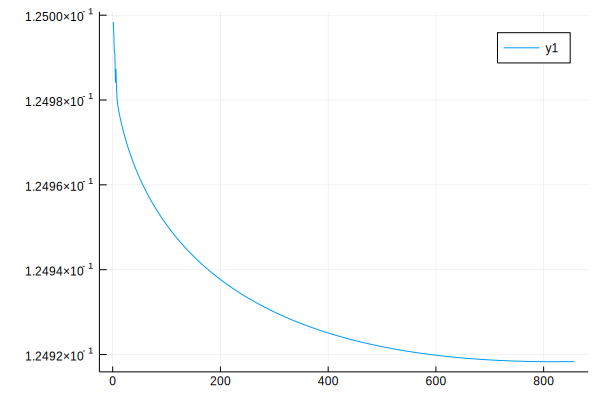

In [247]:
plt = plot(1:size(losses, 1), losses)

## Assignment 1.3: Three-layer multi-layer perceptron ##

To be completed.

## Assignment 1.4: Hyperparameter tuning ##

To be completed.

## Assignment 1.5: Model shootout ##

To be completed.